In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import re
import math
import csv

In [2]:
install = pd.read_csv("experiments/installations.csv")

In [123]:
top = pd.read_csv("funcx/body.csv")
top.Names.iloc[14] = "scikit-learn"
top.Names.iloc[24] = "pillow"
top.Names.iloc[27] = "psij-python"
top.Names.iloc[53] = "globus-sdk"
top.Names.iloc[81] = "PyYAML"
top.Names.iloc[122] = "kafka-python"

map = pd.read_csv("experiments/lib_mapping.txt", header=None)
map.columns = ["Names", "Type"]
top = pd.merge(top,map, on ="Names", how="left")

/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_47811/3851399509.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  top.Names.iloc[14] = "scikit-learn"
/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_47811/3851399509.p

In [140]:
cover = pd.DataFrame()
for i in range(1,93):
    topx = set(top[top.Type!="standard"].Names.head(i).str.lower())
    install_libaries = pd.DataFrame()
    for index, row in install.iterrows():
        if pd.isna(row[1]):
            ins = set()
        else: 
            ins = set([x.lower() for x in row[1].split(";")])
            if "opencv-python" in ins:
                ins.remove("opencv-python")
            if "na" in ins:
                ins.remove("na")
        install_libaries = pd.concat([install_libaries, pd.DataFrame([[row[0], len(ins), len(ins.intersection(topx)), len(topx)]])], ignore_index=True)
    install_libaries.columns = ['imports', 'toInstall', 'topxCovered', 'topx']
    coverage = len(install_libaries[install_libaries.toInstall==install_libaries.topxCovered])
    cover = pd.concat([cover, pd.DataFrame([[i, coverage]])], ignore_index=True)
cover.columns = ["topx", "cover"]

/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_47811/1905118595.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(row[1]):
/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_47811/1905118595.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ins = set([x.lower() for x in row[1].split(";")])
/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_47811/1905118595.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

In [141]:
install_libaries[install_libaries.toInstall!=install_libaries.topxCovered]

,imports,toInstall,topxCovered,topx


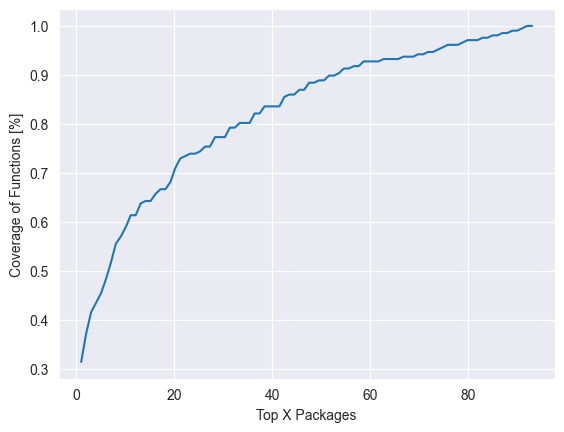

In [152]:
df_normalized = cover.copy()
df_normalized['cv'] = cover.cover / cover.cover.max()
df_normalized['x'] = 93 * cover.topx / cover.topx.max()

# Line plot
sns.lineplot(x='x', y='cv', data=df_normalized)

# Add labels and title
plt.xlabel('Top X Packages')
plt.ylabel('Coverage of Functions [%]')

# Show plot
plt.show()

In [153]:
binder = pd.read_csv("installs.csv")

In [156]:
binder.head()

,ref,conda_channels,conda_packages,pip_packages,apt_packages
0,ab1be186a74c81c83f863bc3b6258fee46eeca56,NaN,NaN,"[""numpy==1.18.5"", ""pandas==1.0.5"", ""fuzzywuzzy...",NaN
1,9267f689d1935f5670e00d63b4f9639226f599ec,NaN,NaN,NaN,NaN
2,2fccf878bf9db2239207b39761d2fc9a78494610,NaN,"[""python=3.7"", ""numpy"", ""pandas"", ""matplotlib""]",NaN,NaN
3,6c2b3723a3b7251a9b4df7d6fd9f0079b8df2ac1,NaN,NaN,NaN,NaN
4,6464ab1b75787590096275bf36b6e3035f23d2ab,NaN,NaN,"[""requests==2.24.0"", ""numpy==1.19.2"", ""matplot...",NaN


In [225]:
def extract(line):
    if isinstance(line, float) and math.isnan(line):
        return ""
    ttt = re.sub("\"", "", line)
    ttt = re.sub("\\[", "", ttt)
    ttt = re.sub("\\]", "", ttt)
    ttt = re.sub(",", "==", ttt)
    ttt = re.sub(">=", "==", ttt)
    ttt = re.sub("<=", "==", ttt)
    ttt = re.sub(">", "==", ttt)
    ttt = re.sub("<", "==", ttt)
    ttt = re.sub(" ", "==", ttt)
    ttt = ttt.split("=")
    result = [entry for entry in ttt if entry and entry[0].isalpha() and "@" not in entry and "/" not in entry]
    return ";".join(result)

In [226]:
binder["imports"] = binder["pip_packages"].apply(extract)

In [227]:
binder

,ref,conda_channels,conda_packages,pip_packages,apt_packages,imports
0,ab1be186a74c81c83f863bc3b6258fee46eeca56,NaN,NaN,"[""numpy==1.18.5"", ""pandas==1.0.5"", ""fuzzywuzzy...",NaN,numpy;pandas;fuzzywuzzy;bs4;geopandas;pycountr...
1,9267f689d1935f5670e00d63b4f9639226f599ec,NaN,NaN,NaN,NaN,
2,2fccf878bf9db2239207b39761d2fc9a78494610,NaN,"[""python=3.7"", ""numpy"", ""pandas"", ""matplotlib""]",NaN,NaN,
3,6c2b3723a3b7251a9b4df7d6fd9f0079b8df2ac1,NaN,NaN,NaN,NaN,
4,6464ab1b75787590096275bf36b6e3035f23d2ab,NaN,NaN,"[""requests==2.24.0"", ""numpy==1.19.2"", ""matplot...",NaN,requests;numpy;matplotlib
...,...,...,...,...,...,...
159641,394381cccbbd63122129a09ca38775731901e1eb,NaN,NaN,NaN,NaN,
159642,64831e2cc32a4877c669b3d16156be7e2d25507d,NaN,NaN,NaN,"[""libudunits2-dev"", ""gdal-bin"", ""libgdal-dev"",...",
159643,2d5f216e18ac6ea8adc7f658d9bd344a49e7289c,"[""conda-forge"", ""defaults""]","[""python=3.7"", ""jinja2"", ""netcdf4"", ""tqdm"", ""r...","[""bestiapop""]",NaN,bestiapop
159644,95b20d80709832d340600461a86417ca5003bf7c,NaN,NaN,"[""voila"", ""fastai>=2"", ""pillow<7"", ""packaging""...",NaN,voila;fastai;pillow;packaging;ipywidgets


In [229]:
packages = [entry.strip() for entry in ";".join(binder.imports).split(";") if entry.strip()]

In [234]:
entry_counts = Counter(packages)
entry_counts = sorted(entry_counts.items(), key=lambda x: x[1], reverse=True)
entry_counts

[('matplotlib', 32998),
 ('numpy', 32819),
 ('pandas', 25523),
 ('scipy', 15946),
 ('ipywidgets', 14811),
 ('voila', 7847),
 ('seaborn', 7234),
 ('scikit-learn', 6022),
 ('requests', 5656),
 ('packaging', 4839),
 ('ipython', 4614),
 ('plotly', 4432),
 ('pillow', 4247),
 ('jupyter', 4235),
 ('python-dateutil', 4030),
 ('six', 4010),
 ('ipykernel', 3746),
 ('sklearn', 3632),
 ('nbconvert', 3476),
 ('notebook', 3451),
 ('fastai', 3345),
 ('tqdm', 3182),
 ('pyparsing', 3155),
 ('traitlets', 3152),
 ('jupyterlab', 3096),
 ('jsonschema', 2845),
 ('ipython-genutils', 2825),
 ('sympy', 2773),
 ('jupyter_contrib_nbextensions', 2729),
 ('jupyter-core', 2702),
 ('tornado', 2700),
 ('decorator', 2685),
 ('pytz', 2664),
 ('jupyter-client', 2649),
 ('cycler', 2626),
 ('python_version', 2618),
 ('pickleshare', 2616),
 ('Pillow', 2597),
 ('Jinja2', 2595),
 ('pyzmq', 2586),
 ('kiwisolver', 2580),
 ('nbformat', 2567),
 ('Pygments', 2557),
 ('MarkupSafe', 2541),
 ('wcwidth', 2520),
 ('prompt-toolkit', 25

In [236]:
with open("binder/binder_top_packages.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Package", "Count"])  # Write header
    for entry, count in entry_counts:
        writer.writerow([entry, count])

In [243]:
binder_top = pd.DataFrame(entry_counts, columns=["Names", "Count"])

In [244]:
binder_top

,Names,Count
0,matplotlib,32998
1,numpy,32819
2,pandas,25523
3,scipy,15946
4,ipywidgets,14811
...,...,...
7653,fprint,1
7654,neo4jrestclient,1
7655,scikit-imagedata,1
7656,furo,1


In [ ]:
cover2 = pd.DataFrame()
for i in range(1,7658):
    topx = set(binder_top.Names.head(i).str.lower())
    install_libaries = pd.DataFrame()
    for index, row in binder.iterrows():
        if pd.isna(row[5]):
            ins = set()
        else: 
            ins = set([x.lower() for x in row[5].split(";")])
        install_libaries = pd.concat([install_libaries, pd.DataFrame([[row[5], len(ins), len(ins.intersection(topx)), len(topx)]])], ignore_index=True)
    install_libaries.columns = ['imports', 'toInstall', 'topxCovered', 'topx']
    coverage = len(install_libaries[install_libaries.toInstall==install_libaries.topxCovered])
    cover2 = pd.concat([cover2, pd.DataFrame([[i, coverage]])], ignore_index=True)
cover2.columns = ["topx", "cover"]

/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_47811/3401565818.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pd.isna(row[5]):
/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_47811/3401565818.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ins = set([x.lower() for x in row[5].split(";")])
/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_47811/3401565818.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use

In [282]:
cover2

,topx,cover
0,3,4500


In [278]:
cover2

,topx,cover
0,1,500


In [273]:
row

ref                        ab1be186a74c81c83f863bc3b6258fee46eeca56
conda_channels                                                  NaN
conda_packages                                                  NaN
pip_packages      ["numpy==1.18.5", "pandas==1.0.5", "fuzzywuzzy...
apt_packages                                                    NaN
imports           numpy;pandas;fuzzywuzzy;bs4;geopandas;pycountr...
Name: 0, dtype: object

In [253]:
set([x.lower() for x in row[5].split(";")])

/var/folders/86/fyd29lqj0033vg6drb2b412m0000gn/T/ipykernel_47811/335722442.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  set([x.lower() for x in row[5].split(";")])


{'bokeh',
 'bs4',
 'fuzzywuzzy',
 'geopandas',
 'matplotlib',
 'numpy',
 'pandas',
 'pycountry',
 'seaborn',
 'sklearn',
 'xlrd'}